In [1]:
import pandas as pd
import numpy as np
import textblob
import nltk

import re
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data =pd.read_csv('../input/emotional-data/Emotion analysis using NLP -code/dataset/train.txt',sep = ';',names = ['Input','Sentiment'],encoding='utf-8')

In [3]:
data

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [4]:
data.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [5]:
data['Sentiment'].replace('anger', 0,inplace =True)
data['Sentiment'].replace('fear', 1,inplace =True)
data['Sentiment'].replace('joy', 2,inplace =True)
data['Sentiment'].replace('love', 3,inplace =True)
data['Sentiment'].replace('sadness', 4,inplace =True)
data['Sentiment'].replace('surprise', 5,inplace =True)

In [6]:
data

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


In [7]:
data.Sentiment.value_counts()

2    5362
4    4666
0    2159
1    1937
3    1304
5     572
Name: Sentiment, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

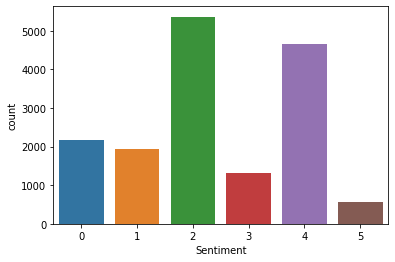

In [8]:
sns.countplot((data['Sentiment']))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [10]:
x= data.Input
y= data.Sentiment

In [11]:
y.shape
y=np.array(y)

In [12]:
y

array([4, 4, 0, ..., 2, 0, 4])

In [13]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [14]:
len(data)

16000

In [15]:
words =[]
for i in range(0,len(x)):
    word = re.sub('[^a-zA-Z]', ' ',x[i])
    word = word.lower()
    word = word.split()
    word = [ps.stem(text) for text in word if not text in stopwords.words('english') ]
    
    word = ' '.join(word)
    words.append(word)
    

In [16]:

from keras_preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences

In [17]:
one_hot

<function keras_preprocessing.text.one_hot(text, n, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')>

In [18]:
one_hot_representation = [one_hot(value, 10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,) for value in words]

In [19]:
one_hot_representation[0]

[3276, 2032, 7427]

In [20]:
padding = pad_sequences(one_hot_representation,padding ='pre', maxlen = 30)

In [21]:
padding.shape

(16000, 30)

In [22]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

In [23]:
model = Sequential()
model.add(Embedding(10000,40, input_length = 20))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(6,activation ='relu'))
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

model.summary()

2022-06-18 19:07:17.165250: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dense (Dense)                (None, 6)                 1206      
Total params: 514,006
Trainable params: 514,006
Non-trainable params: 0
_________________________________________________________________


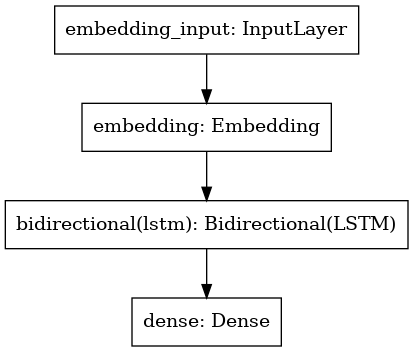

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [25]:
input_data = np.array(padding)
output_data = y

In [26]:
input_data

array([[   0,    0,    0, ..., 3276, 2032, 7427],
       [   0,    0,    0, ..., 3205, 6273, 9974],
       [   0,    0,    0, ..., 2032, 4958, 3899],
       ...,
       [   0,    0,    0, ..., 9917, 4032, 3217],
       [   0,    0,    0, ..., 4034, 2061, 3486],
       [   0,    0,    0, ..., 2032, 5539, 1466]], dtype=int32)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(input_data,output_data,test_size = 0.33,random_state=42)

In [28]:
y_train.shape

(10720,)

In [29]:
model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs =10,batch_size =20)

2022-06-18 19:07:19.080299: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
536/536 [==============================] - 27s 45ms/step - loss: 2.4615 - accuracy: 0.5046 - val_loss: 2.7725 - val_accuracy: 0.6511
Epoch 2/10
536/536 [==============================] - 24s 44ms/step - loss: 1.9922 - accuracy: 0.2694 - val_loss: 1.7918 - val_accuracy: 0.1259
Epoch 3/10
536/536 [==============================] - 23s 43ms/step - loss: 1.7918 - accuracy: 0.1394 - val_loss: 1.7918 - val_accuracy: 0.1259
Epoch 4/10
536/536 [==============================] - 23s 44ms/step - loss: 1.7918 - accuracy: 0.1394 - val_loss: 1.7918 - val_accuracy: 0.1259
Epoch 5/10
536/536 [==============================] - 24s 44ms/step - loss: 1.7918 - accuracy: 0.1394 - val_loss: 1.7918 - val_accuracy: 0.1259
Epoch 6/10
536/536 [==============================] - 24s 45ms/step - loss: 1.7918 - accuracy: 0.1394 - val_loss: 1.7918 - val_accuracy: 0.1259
Epoch 7/10
536/536 [==============================] - 23s 42ms/step - loss: 1.7918 - accuracy: 0.1394 - val_loss: 1.7918 - val_accuracy:

In [30]:
#model testing 
def model_test(string):
    words =[]
    word = re.sub('[^a-zA-Z]', ' ',string)
    word = word.lower()
    word = word.split()
    word = [ps.stem(text) for text in word if not text in stopwords.words('english') ]
    
    word = ' '.join(word)
    words.append(word)
    
    one_hot_representation = [one_hot(value, 10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,) for value in words]
    padding = pad_sequences(one_hot_representation,padding ='pre', maxlen = 30)
    
    model = Sequential()
    model.add(Embedding(10000,40, input_length = 20))
    model.add(Bidirectional(LSTM(100)))
    model.add(Dense(6,activation ='relu'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    
    prediction = np.argmax(model.predict(padding), axis=1)
    
    print(prediction)
    
    if prediction ==0:
        print('person is angry')
    elif prediction ==1:
        print('person is in fear')
    elif prediction ==2:
        print('person is in joy')
    elif prediction ==3:
        print('person is in love')
    elif prediction ==4:
        print('person is sad')
    else:
        print('person is in surprise')
        
#text = str(input('enter input : '))
#model_test(text)
    



In [31]:
model.save('emotion_detection.h5')